In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt

from mcopt import MorseComplex, MorseGraph, ot

# Construct Morse Graphs

In [3]:
mg = MorseGraph.from_complex(MorseComplex.read('../gen_complexes/sinusoidal')).sample(5)
mg_noisy = MorseGraph.from_complex(MorseComplex.read('../gen_complexes/sinusoidal_noisy')).sample(5)

## Initial Graphs

Text(0.5, 1.0, 'Noisy Morse Graph')

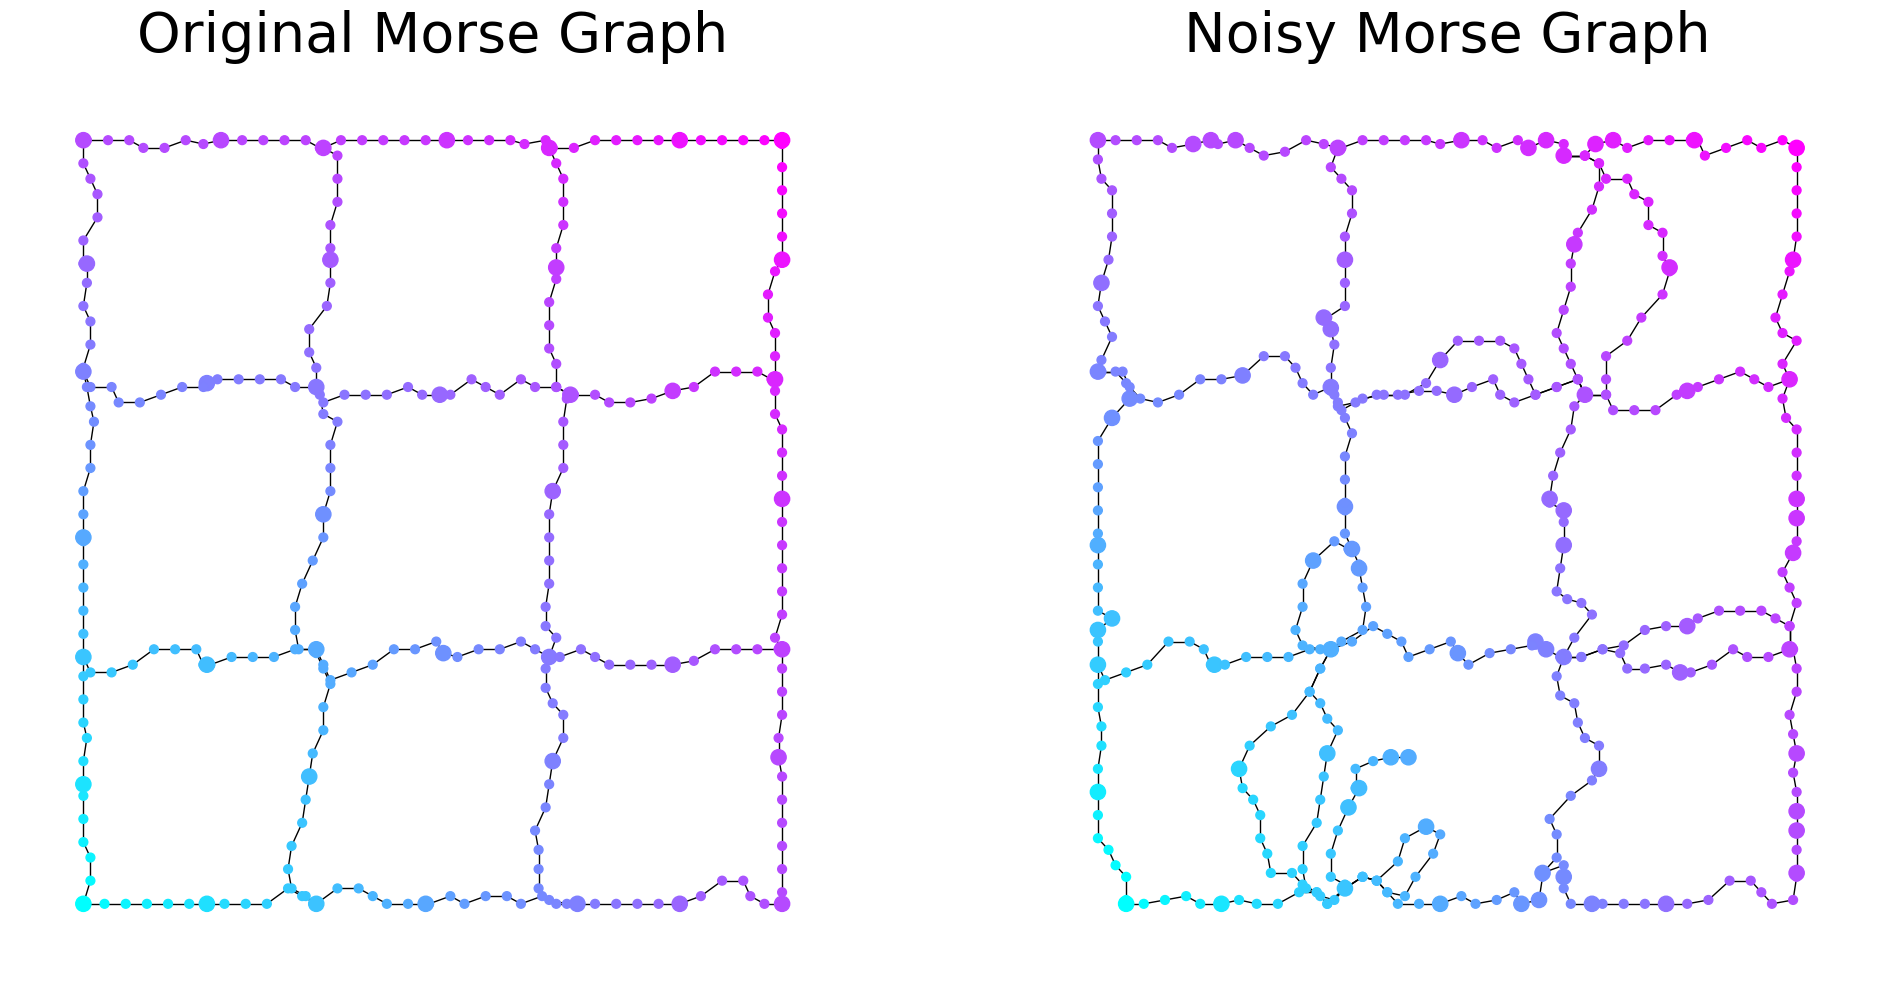

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(24, 12))
cmap = 'cool'

mg.draw(ax=axes[0], node_size=40, cmap=cmap)
axes[0].set_title('Original Morse Graph', fontsize=40)

mg_noisy.draw(ax=axes[1], node_size=40, cmap=cmap)
axes[1].set_title('Noisy Morse Graph', fontsize=40)

# Gromov-Wasserstein Optimal Transport


In [5]:
mg_space = mg.to_mp()
mg_noisy_space = mg_noisy.to_mp()

In [6]:
coupling, _ = ot.GW(mg_space, mg_noisy_space, random_G0=True, random_state=42)

In [7]:
M = MorseGraph.attribute_cost_matrix(mg, mg_noisy)

fused_coupling, _ = ot.fGW(mg_space, mg_noisy_space, M, random_G0=True, random_state=42)

In [8]:
m = 0.95

partial_coupling, _ = ot.pGW(mg_space, mg_noisy_space, m, random_G0=True, random_state=42)

In [9]:
partial_fused_coupling, _ = ot.fpGW(mg_space, mg_noisy_space, m, M, random_G0=True, random_state=42)

In [10]:
unbalanced_coupling = ot.uGW(mg_space, mg_noisy_space)

Text(0.5, 1.0, 'Noisy Complex Morse Graph \n (Unbalanced Gromov-Wasserstein Transport)')

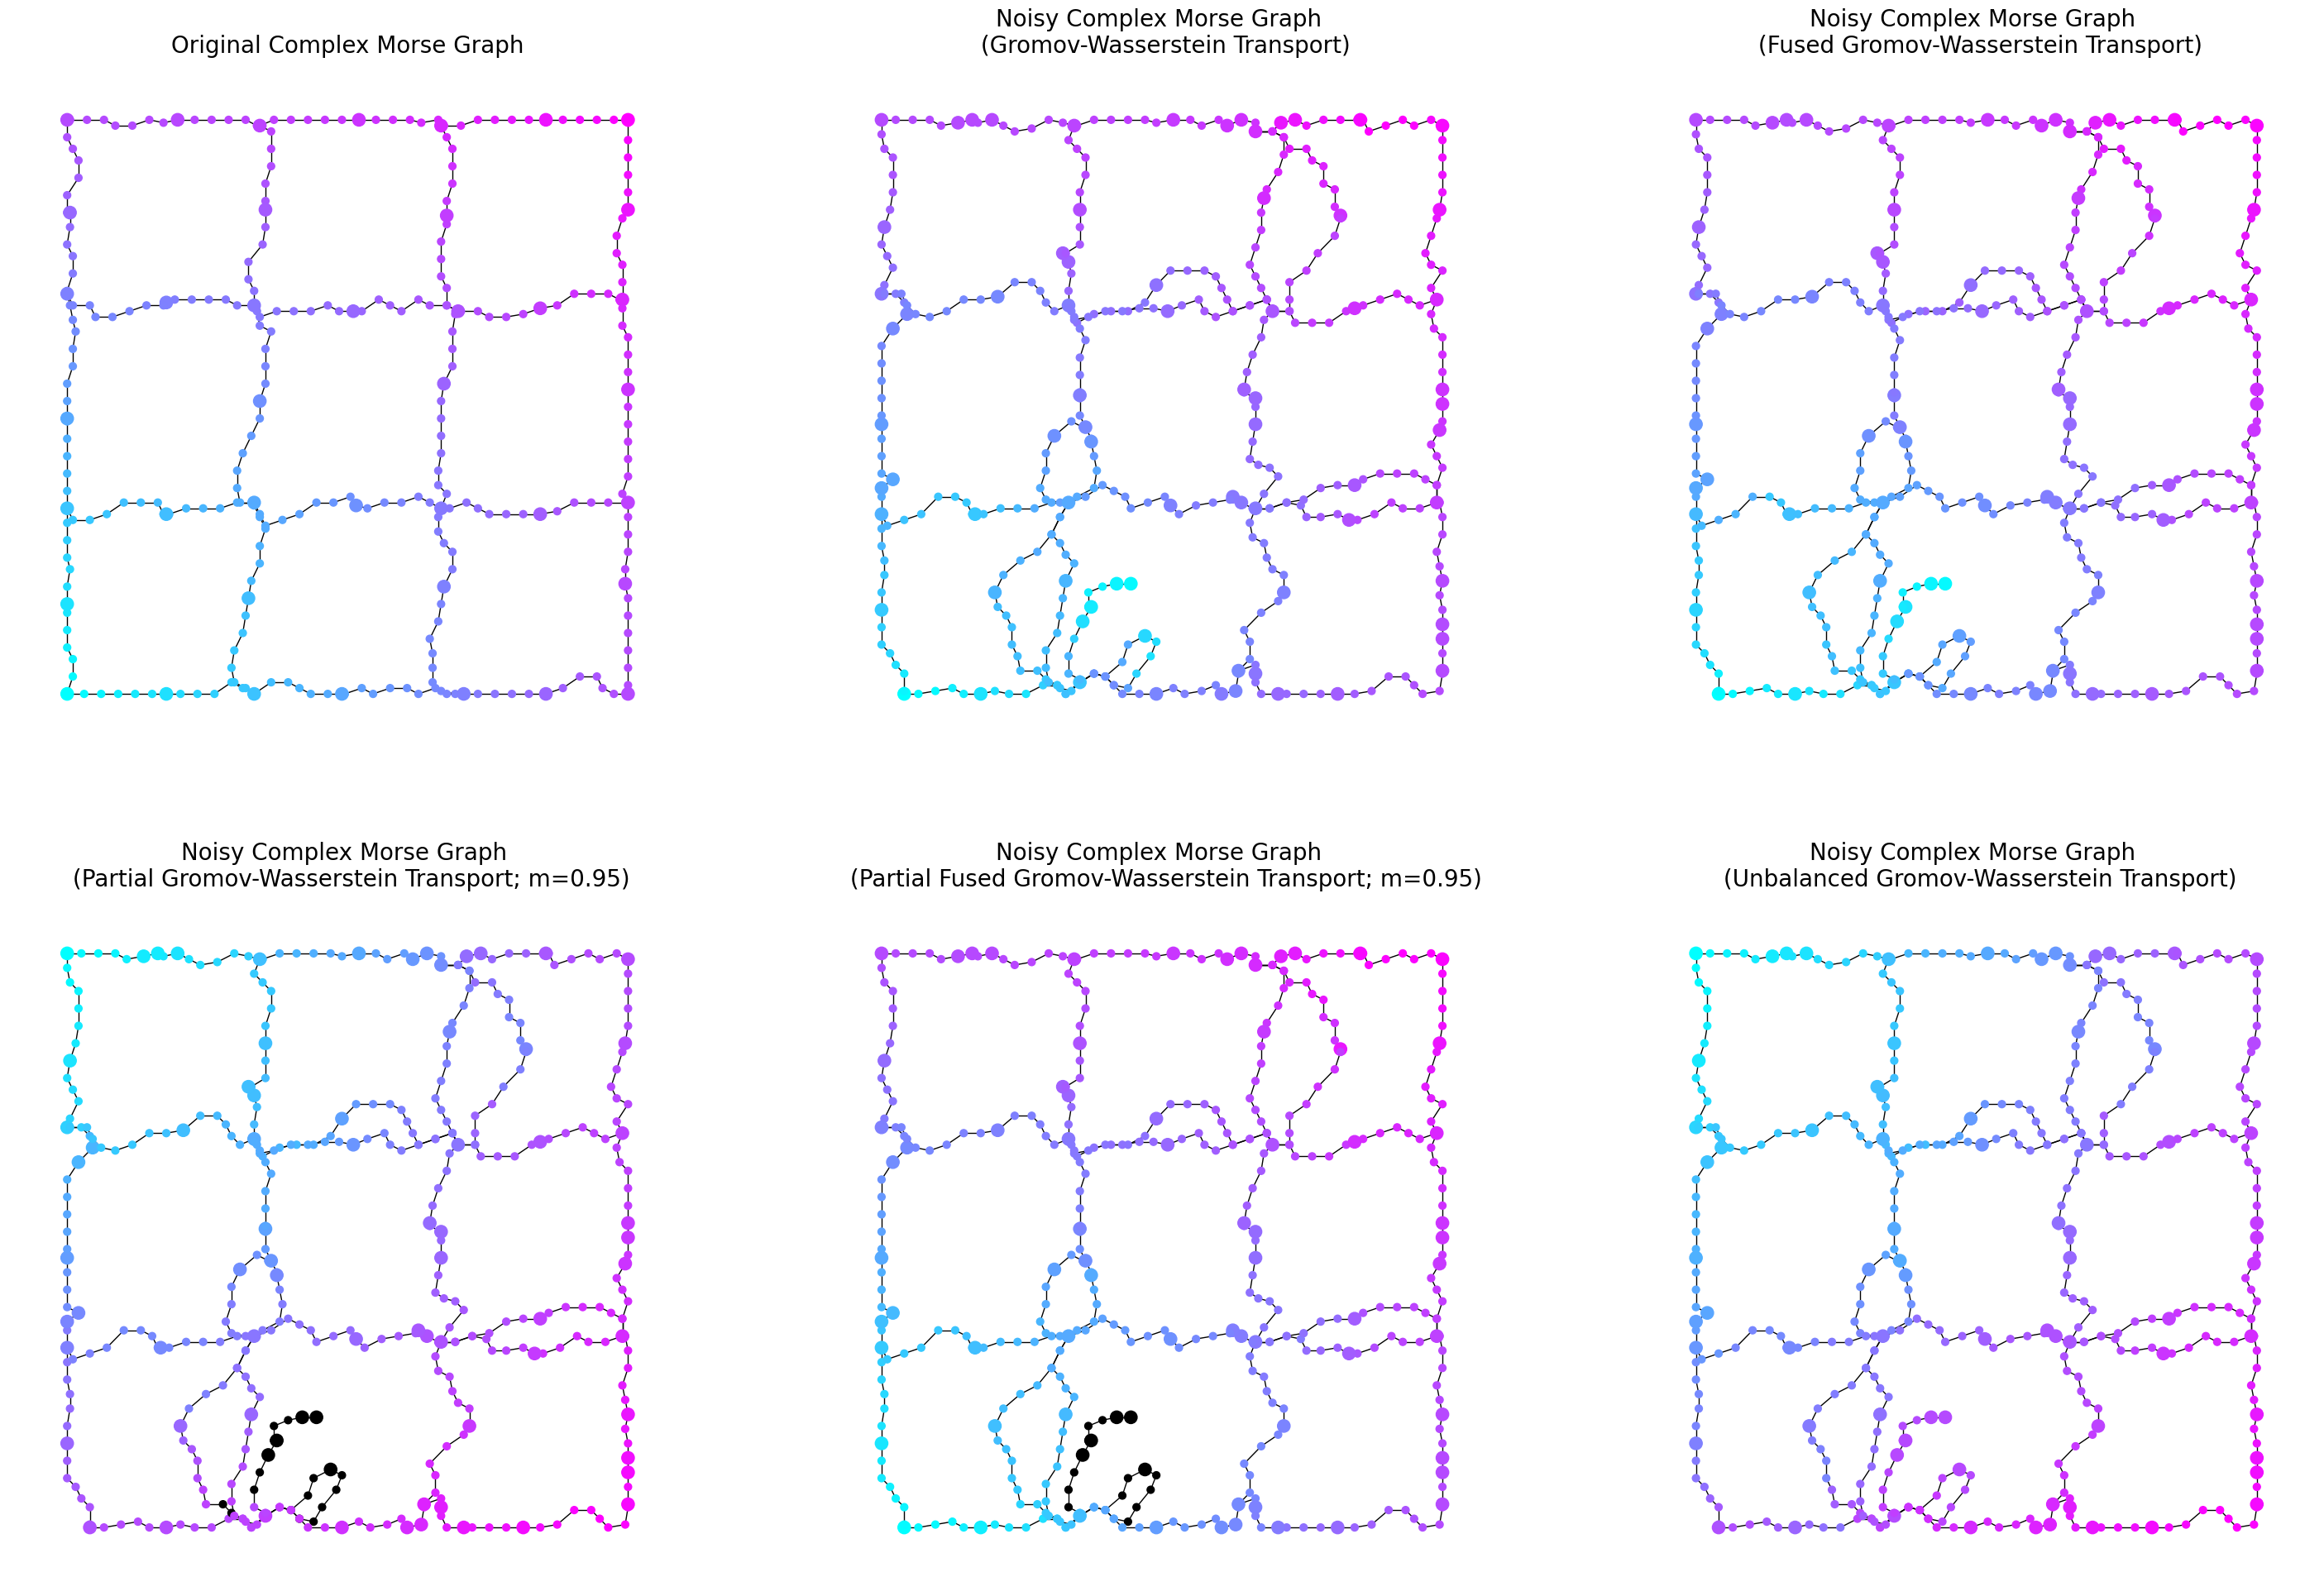

In [12]:
fig, axes = plt.subplots(2, 3, figsize=(36, 24))
cmap = 'cool'

mg_node_color = mg.color_by_position()

mg.draw(
  ax=axes[0,0],
  node_size=40,
  node_color=mg_node_color,
  cmap=cmap
)
axes[0,0].set_title('Original Complex Morse Graph', fontsize=20)

mg_noisy.draw(
  ax=axes[0,1],
  node_size=40,
  node_color=mg_noisy.color_by_coupling(mg_node_color, coupling),
  cmap=cmap
)
axes[0,1].set_title('Noisy Complex Morse Graph \n (Gromov-Wasserstein Transport)', fontsize=20)

mg_noisy.draw(
  ax=axes[0,2],
  node_size=40,
  node_color=mg_noisy.color_by_coupling(mg_node_color, fused_coupling),
  cmap=cmap
)
axes[0,2].set_title('Noisy Complex Morse Graph \n (Fused Gromov-Wasserstein Transport)', fontsize=20)

mg_noisy.draw(
  ax=axes[1,0],
  node_size=40,
  node_color=mg_noisy.color_by_coupling(mg_node_color, partial_coupling),
  cmap=cmap
)
axes[1,0].set_title(f'Noisy Complex Morse Graph \n (Partial Gromov-Wasserstein Transport; m={m})', fontsize=20)

mg_noisy.draw(
  ax=axes[1,1],
  node_size=40,
  node_color=mg_noisy.color_by_coupling(mg_node_color, partial_fused_coupling),
  cmap=cmap
)
axes[1,1].set_title(f'Noisy Complex Morse Graph \n (Partial Fused Gromov-Wasserstein Transport; m={m})', fontsize=20)

mg_noisy.draw(
  ax=axes[1,2],
  node_size=40,
  node_color=mg_noisy.color_by_coupling(mg_node_color, unbalanced_coupling),
  cmap=cmap
)
axes[1,2].set_title(f'Noisy Complex Morse Graph \n (Unbalanced Gromov-Wasserstein Transport)', fontsize=20)